<a href="https://colab.research.google.com/github/m-bkarimi/Grokking-Deep-Learning/blob/master/chapter4_gdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=red>predict *Compare* learning </font> 

Compare: Does your network make good predictions?


In [ ]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8
pred = input * knob_weight
error = (pred - goal_pred) ** 2
print(error)

0.30250000000000005


<font color = red>**Why is the error squared?** </font>



Think about an archer hitting a target. When the shot hits 2 inches too high, how much
did the archer miss by? When the shot hits 2 inches too low, how much did the archer
miss by? Both times, the archer missed by only 2 inches. The primary reason to square
“how much you missed” is that it forces the output to be positive. (pred - goal_pred)
could be negative in some situations, unlike actual error.

<font color = red>**Doesn’t squaring make big errors (>1) bigger and small errors (<1) smaller?**</font>

Yeah … It’s kind of a weird way of measuring error, but it turns out that amplifying big
errors and reducing small errors is OK. Later, you’ll use this error to help the network learn,
and you’d rather it pay attention to the big errors and not worry so much about the small
ones. Good parents are like this, too: they practically ignore errors if they’re small enough
(breaking the lead on your pencil) but may go nuclear for big errors (crashing the car). See
why squaring is valuable?

<font color = red>**Different ways of measuring error prioritize error differently.**</font>

If this is a bit of a stretch right now, that’s OK, but think back to what I said earlier: by
squaring the error, numbers that are less than 1 get smaller, whereas numbers that are greater
than 1 get bigger. You’re going to change what I call pure error (pred - goal_pred) so that
bigger errors become very big and smaller errors quickly become irrelevant.
By measuring error this way, you can prioritize big errors over smaller ones. When you have
somewhat large pure errors (say, 10), you’ll tell yourself that you have very large error (10^2 ==
100); and in contrast, when you have small pure errors (say, 0.01), you’ll tell yourself that you
have very small error (0.01^2 == 0.0001). See what I mean about prioritizing? It’s just modifying
what you consider to be error so that you amplify big ones and largely ignore small ones.
In contrast, if you took the absolute value instead of squaring the error, you wouldn’t have this
type of prioritization. The error would just be the positive version of the pure error—which
would be fine, but different. More on this later.

<font color=red>**Why do you want only positive error?**</font>

Eventually, you’ll be working with millions of input -> goal_prediction pairs, and we’ll
still want to make accurate predictions. So, you’ll try to take the average error down to 0.
This presents a problem if the error can be positive and negative. Imagine if you were
trying to get the neural network to correctly predict two datapoints—two input ->
goal_prediction pairs. If the first had an error of 1,000 and the second had an error of
–1,000, then the average error would be zero! You’d fool yourself into thinking you predicted
perfectly, when you missed by 1,000 each time! That would be really bad. Thus, you want the
error of each prediction to always be positive so they don’t accidentally cancel each other out
when you average them.

<font color=red>**What’s the simplest form of neural learning?**</font>

Learning using the hot and cold method.

**Hot and cold learning**

Hot and cold learning means wiggling the weights to see which direction reduces the error
the most, moving the weights in that direction, and repeating until the error gets to 0.


In [ ]:
# PREDICT: Making a prediction and evaluating error
weight = 0.1
lr = 0.01
def neural_network(input, weight):
  prediction = input * weight
  return prediction
number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
true = win_or_lose_binary[0]
pred = neural_network(input,weight)
error = (pred - true) ** 2
print(error)

0.022499999999999975


In [ ]:
# COMPARE: Making a prediction with a lower and upper weight and evaluating error
lr = 0.01
p_dn = neural_network(input,weight-lr)
e_dn = (p_dn - true) ** 2
p_up = neural_network(input,weight+lr)
e_up = (p_up - true) ** 2
print(e_dn)

0.05522499999999994


In [ ]:
# COMPARE + LEARN: Comparing the errors and setting the new weight
if (error > e_dn or error > e_up):
  if(e_dn < e_up):
    weight -= lr
  if(e_up < e_up):
    weight += lr
print(weight)

0.1


<font color=red>**Hot and cold learning**</font>

This is perhaps the simplest form of learning.


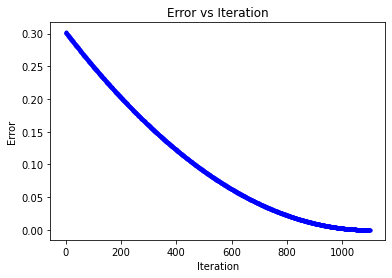

In [ ]:
import matplotlib.pyplot as plt
weight = 0.5
input = 0.5
goal_prediction = 0.8
step_amount = 0.001  # How much to move the weights each iteration
for iteration in range(1101):
  prediction = input * weight
  error = (prediction - goal_prediction) ** 2
  # print("Error:" + str(error) + " Prediction:" + str(prediction))
  up_prediction = input * (weight + step_amount)
  up_error = (goal_prediction - up_prediction) ** 2
  down_prediction = input * (weight - step_amount)
  down_error = (goal_prediction - down_prediction) ** 2
  if(down_error < up_error):
    weight = weight - step_amount
  if(down_error > up_error):
    weight = weight + step_amount
  # print(weight)
  # plot the error values for each iteration
  plt.plot(iteration, up_error, 'b.-')
  # plt.plot(iteration, down_error, 'r.-')

  # set the plot title and axis labels
  plt.title('Error vs Iteration')
  plt.xlabel('Iteration')
  plt.ylabel('Error')

# display the plot
plt.show()

<font color = red> **Characteristics of hot and cold learning**</font>

-- It’s simple.
-- Problem 1: It’s inefficient.
-- Problem 2: Sometimes it’s impossible to predict the exact goal prediction.



<font color= red>**Calculating both direction and amount from error**</font>




In [ ]:
weight = 0.5
goal_pred = 0.8
input = 0.5

for iteration in range(20):
  pred = input * weight
  error = (pred - goal_pred) ** 2
  direction_and_amount = (pred - goal_pred) * input
  weight = weight - direction_and_amount
  print("Error:" + str(error) + " Prediction:" + str(pred))

<font color=red> **What is direction_and_amount?** </font>

direction_and_amount represents how you want to change weight . The first part b
is what I call pure error, which equals ( pred - goal_pred ). (More about this shortly.) The
second part c is the multiplication by the input that performs scaling, negative reversal,
and stopping, modifying the pure error so it’s ready to update weight .

<font color =red>**What is the pure error?**</font>

The pure error is ( pred - goal_pred ), which indicates the raw direction and amount you
missed. If this is a positive number, you predicted too high, and vice versa. If this is a big
number, you missed by a big amount, and so on.

<font color=red> **What are scaling, negative reversal, and stopping?**</font>

These three attributes have the combined effect of translating the pure error into the absolute
amount you want to change weight . They do so by add ressing three major edge cases
where the pure error isn’t sufficient to make a good modification to weight .

<font color=red> **What is stopping?**</font>

Stopping is the first (and simplest) effect on the pure error caused by multiplying it by
input . Imagine plugging a CD player into your stereo. If you turned the volume all the
way up but the CD player was off, the volume change wouldn’t matter. Stopping addresses
this in a neural network. If input is 0, then it will force direction_and_amount to also
be 0. You don’t learn (change the volume) when input is 0, because there’s nothing
to learn. Every weight value has the same error , and moving it makes no difference
because pred is always 0.

<font color=red>**What is negative reversal?**</font>

This is probably the most difficult and important effect. Normally (when input is positive),
moving weight upward makes the prediction move upward. But if input is negative,
then all of a sudden weight changes directions! When input is negative, moving
weight up makes the prediction go down. It’s reversed! How do you address this? Well,
multiplying the pure error by input will reverse the sign of direction_and_amount in
the event that input is negative. This is negative reversal, ensuring that weight moves in
the correct direction even if input is negative.

<font color=red>**What is scaling?**</font>

Scaling is the third effect on the pure error caused by multiplying it by input . Logically, if
input is big, your weight update should also be big. This is more of a side effect, because
it often goes out of control. Later, you’ll use alpha to address when that happens.

<font color=red> **One iteration of gradient descent**</font>

This performs a weight update on a single training example
(input->true) pair.


In [ ]:
# 1 An empty network
weight = 0.1
alpha = 0.01
def neural_network(input, weight):
		prediction = input * weight
		return prediction
# 2 PREDICT: Making a prediction and evaluating error
number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]
pred = neural_network(input,weight)
error = (pred - goal_pred) ** 2
# 3 COMPARE: Calculating the node delta and putting it on the output node
delta = pred - goal_pred
# 4 LEARN: Calculating the weight delta and putting it on the weight
weight_delta = input * delta
# LEARN: Updating the weight

weight -= weight_delta * alpha


You multiply weight_delta by a small number alpha before using it to update weight . This
lets you control how fast the network learns. If it learns too fast, it can update weights too
aggressively and overshoot. (More on this later.) Note that the weight update made the same
change (small increase) as hot and cold learning.

<font color=red>**Learning is just reducing error**</font>

You can modify weight to reduce error.

<font color=red>**The golden method for learning**</font>

This approach adjusts each weight in the correct direction and by the correct amount so
that error reduces to 0.

All you’re trying to do is figure out the right direction and amount to modify weight so that
error goes down. The secret lies in the pred and error calculations. Notice that you use pred
inside the error calculation. Let’s replace the pred variable with the code used to generate it:
error = ((input * weight) - goal_pred) ** 2
This doesn’t change the value of error at all! It just combines the two lines of code and
computes error directly. Remember that input and goal_prediction are fixed at 0.5 and
0.8, respectively (you set them before the network starts training). So, if you replace their
variables names with the values, the secret becomes clear:
error = ((0.5 * weight) - 0.8) ** 2

<font color=red>**The secret**</font>

For any input and goal_pred , an exact relationship is defined between error and weight ,
found by combining the prediction and error formulas. In this case:
error = ((0.5 * weight) - 0.8) ** 2



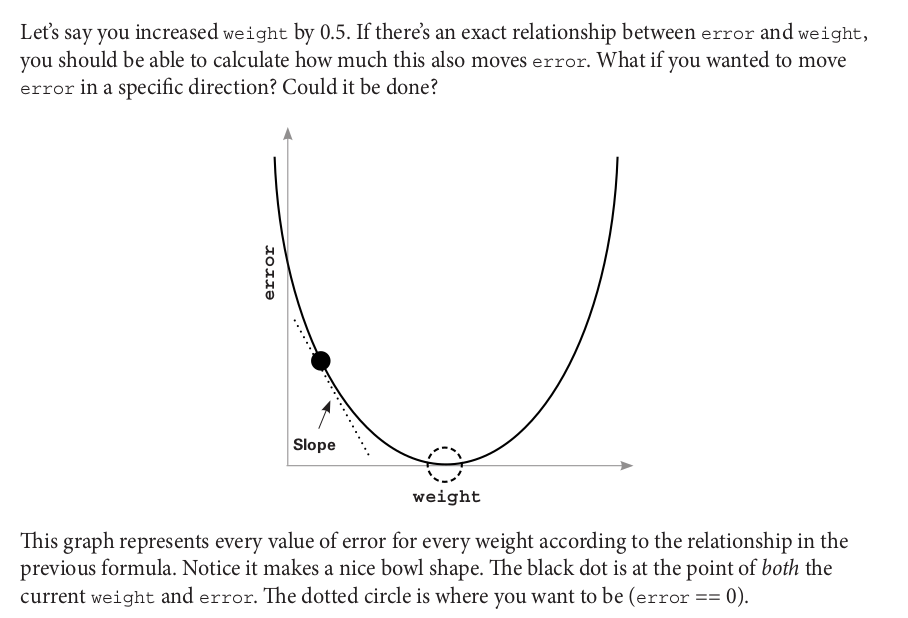

<font color=red> **Let’s watch several steps of learning** </font>

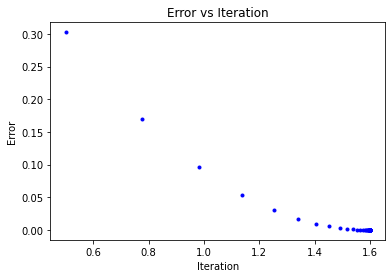

In [ ]:
weight, goal_pred, input = (0.5, 0.8, 0.5)
for iteration in range(50):
  # print("-----\nWeight:" + str(weight))

  pred = input * weight
  error = (pred - goal_pred) ** 2
  plt.plot(weight, error, 'b.-')
  # plt.plot(iteration, down_error, 'r.-')

  # set the plot title and axis labels
  plt.title('Error vs Iteration')
  plt.xlabel('Iteration')
  plt.ylabel('Weight')
  delta = pred - goal_pred
  weight_delta = delta * input
  weight = weight - weight_delta
  # print("Error:" + str(error) + " Prediction:" + str(pred))
  # print("Delta:" + str(delta) + " Weight Delta:" + str(weight_delta))
  # plot the error values for each iteration

plt.show()

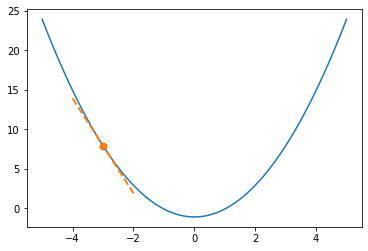

In [ ]:
# Define parabola
def f(x): 
    return x**2-1.1

# Define parabola derivative
def slope(x): 
    return 2*x

# Define x data range for parabola
x = np.linspace(-5,5,100)

# Choose point to plot tangent line
x1 = -3
y1 = f(x1)

# Define tangent line
# y = m*(x - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

# Define x data range for tangent line
xrange = np.linspace(x1-1, x1+1, 10)

# Plot the figure
plt.figure()
plt.plot(x, f(x))
plt.scatter(x1, y1, color='C1', s=50)
plt.plot(xrange, line(xrange, x1, y1), 'C1--', linewidth = 2)


In [ ]:
weight = 0.5
goal_pred = 0.8
input = 0.5
for iteration in range(20):
  pred = input * weight
  error = (pred - goal_pred) ** 2
  direction_and_amount = (pred - goal_pred) * input
  weight = weight - direction_and_amount
  print("Error:" + str(error) + " Prediction:" + str(pred))

<font color=red>**Concept: Learning is adjusting the weight to reduce the errorto 0. **</font>

So far in this chapter, we’ve been hammering on the idea that learning is really just about
adjusting weight to reduce error to 0. This is the secret sauce. Truth be told, knowing how to
do this is all about understanding the relationship between weight and error. If you understand
this relationship, you can know how to adjust weight to reduce error.
What do I mean by “understand the relationship”? Well, to understand the relationship between
two variables is to understand how changing one variable changes the other. In this case, what
you’re really after is the sensitivity between these two variables. Sensitivity is another name for
direction and amount.

As
mentioned, they quietly define an exact relationship between error and weight:
error = ((input * weight) - goal_pred) ** 2

This line of code, ladies and gentlemen, is the secret. This is a formula. This is the relationship
between error and weight. This relationship is exact. It’s computable. It’s universal. It is and will
always be
Now, how can you use this formula to know how to change weight so that error moves in a
particular direction? That is the right question. Stop. I beg you. Stop and appreciate this moment.
This formula is the exact relationship between these two variables, and now you’re going to
figure out how to change one variable to move the other variable in a particular direction.
As it turns out, there’s a method for doing this for any formula. 

<font color=red> **How to use a derivative to learn**</font>

**weight_delta is your derivative.**
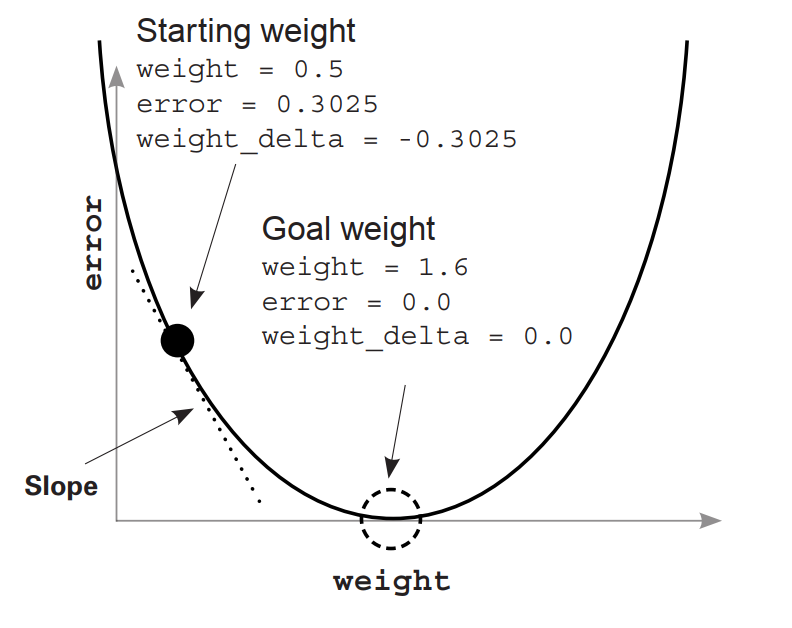


So, how do you use the derivative to find the error minimum (lowest point in the error graph)?
You move the opposite direction of the slope—the opposite direction of the derivative. You can
take each weight value, calculate its derivative with respect to error (so you’re comparing two
variables: weight and error), and then change weight in the opposite direction of that slope.
That will move you to the minimum.

This method for learning (finding error minimums) is called **gradient descent**. This name should
seem intuitive. You move the weight value opposite the gradient value, which reduces error to
0. By opposite, I mean you increase the weight when you have a negative gradient, and vice versa.
It’s like gravity

<font color=red>**overcorrections**</font>

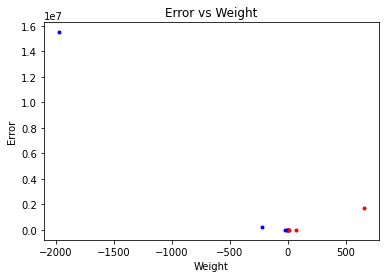

In [ ]:
import matplotlib.pyplot as plt

weight = 0.5
goal_pred = 0.8
input = 2
for iteration in range(10):
  pred = input * weight
  error = (pred - goal_pred) ** 2
  delta = pred - goal_pred
  if delta<0:
    plt.plot(weight, error, 'b.-')
  else:
    plt.plot(weight, error, 'r.-')
  # plt.plot(iteration, down_error, 'r.-')

  # set the plot title and axis labels
  plt.title('Error vs Weight')
  plt.xlabel('Weight')
  plt.ylabel('Error')
  weight_delta = input * delta
  weight = weight - weight_delta
  # print("Error:" + str(error) + " Prediction:" + str(pred))
plt.show()


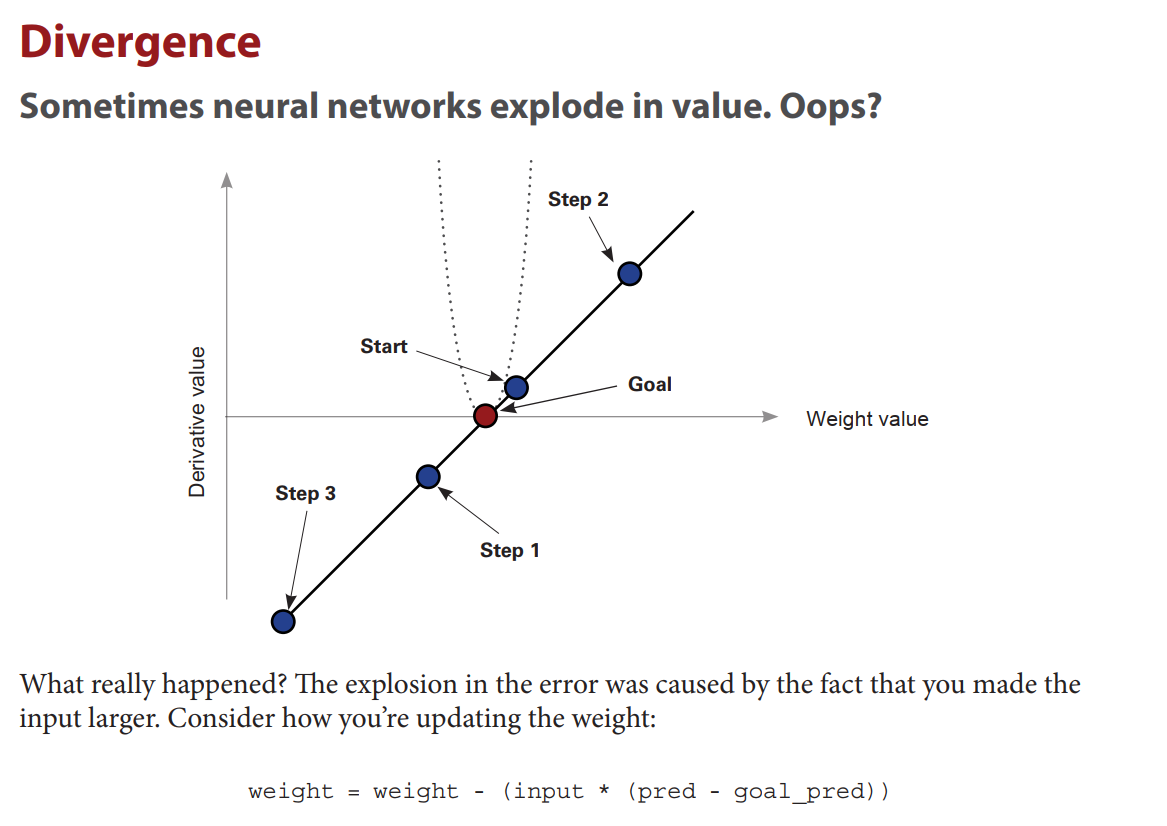
If the input is sufficiently large, this can make the weight update large even when the error is
small. What happens when you have a large weight update and a small error? The network
overcorrects. If the new error is even bigger, the network overcorrects even more. This
causes the phenomenon you saw earlier, called divergence.
If you have a big input, the prediction is very sensitive to changes in the weight (because
pred = input * weight). This can cause the network to overcorrect. In other words, even
though the weight is still starting at 0.5, the derivative at that point is very steep. See how
tight the U-shaped error curve is in the graph?
This is really intuitive. How do you predict? By multiplying the input by the weight. So, if the
input is huge, small changes in the weight will cause changes in the prediction. The error is
very sensitive to the weight. In other words, the derivative is really big. How do you make
it smaller?

<font color=red>**Introducing alpha**</font>

**It’s the simplest way to prevent overcorrecting weight updates.**

What’s the problem you’re trying to solve? That if the input is too big, then the weight
update can overcorrect. What’s the symptom? That when you overcorrect, the new
derivative is even larger in magnitude than when you started (although the sign will be
the opposite).

The symptom is this overshooting. The solution is to multiply the weight update by a
fraction to make it smaller. In most cases, this involves multiplying the weight update
by a single real-valued number between 0 and 1, known as alpha. Note: this has no
effect on the core issue, which is that the input is larger. It will also reduce the weight
updates for inputs that aren’t too large.
Finding the appropriate alpha, even for state-of-the-art neural networks, is often done
by guessing. You watch the error over time. If it starts diverging (going up), then the
alpha is too high, and you decrease it. If learning is happening too slowly, then the alpha
is too low, and you increase it. There are other methods than simple gradient descent
that attempt to counter for this, but gradient descent is still very popular.